In [92]:
import pandas as pd

# Load the data to begin the EDA and preprocessing
file_path = 'airplane_crash_data.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset to understand its structure
data_info = data.info()
data_head = data.head()

data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [93]:
type(data_head.Date[0])

str

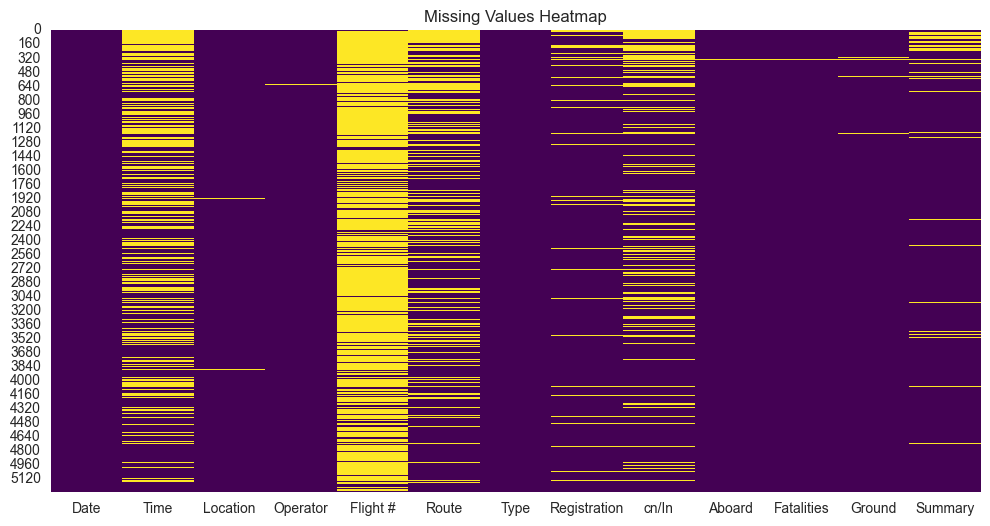

(Flight #        4199
 Time            2219
 Route           1707
 cn/In           1228
 Summary          390
 Registration     335
 Type              27
 Aboard            22
 Ground            22
 Location          20
 Operator          18
 Fatalities        12
 Date               0
 dtype: int64,
             Aboard   Fatalities       Ground
 count  5246.000000  5256.000000  5246.000000
 mean     27.554518    20.068303     1.608845
 std      43.076711    33.199952    53.987827
 min       0.000000     0.000000     0.000000
 25%       5.000000     3.000000     0.000000
 50%      13.000000     9.000000     0.000000
 75%      30.000000    23.000000     0.000000
 max     644.000000   583.000000  2750.000000)

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Checking for missing values
missing_values = data.isnull().sum().sort_values(ascending=False)

# Descriptive statistics for numerical columns
numerical_summary = data.describe()

# Visualizing missing data
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

missing_values, numerical_summary


In [95]:
# Assuming 'data' is your DataFrame
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract 'Year' from the 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Linear interpolation for missing numerical values (excluding categorical columns)
data[['Aboard', 'Fatalities', 'Ground']] = data[['Aboard', 'Fatalities', 'Ground']].interpolate(method='linear')

# Fill remaining missing values in categorical columns with 'Unknown'
data = data.fillna('Unknown')

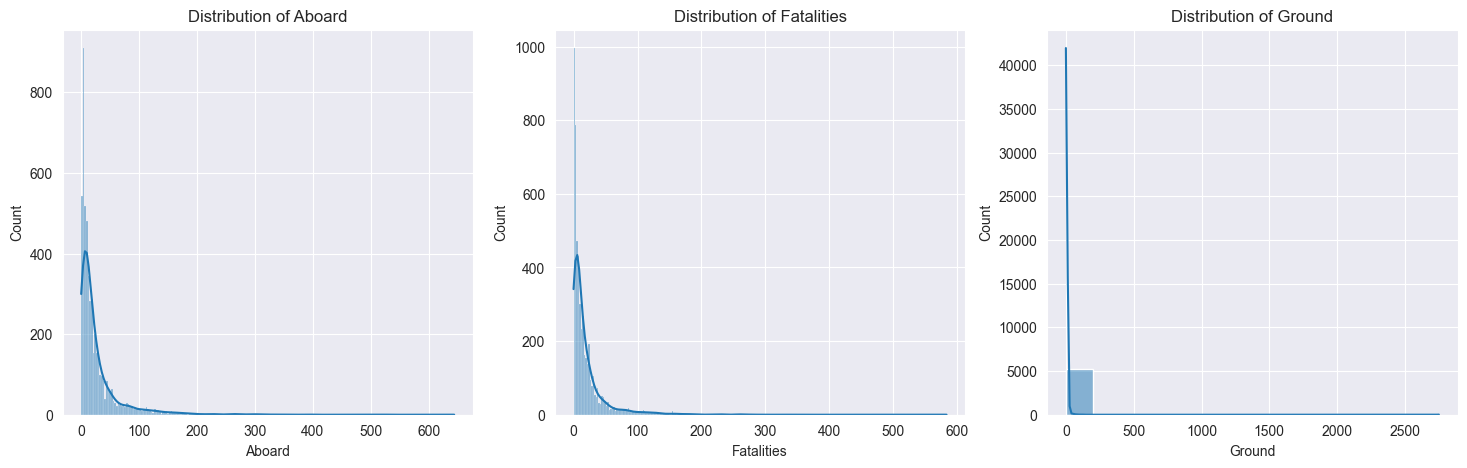

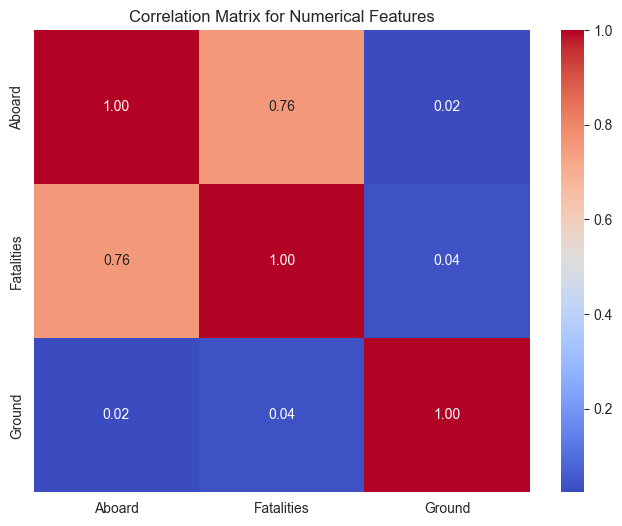

,Aboard,Fatalities,Ground
Aboard,1.000000,0.756536,0.023269
Fatalities,0.756536,1.000000,0.035193
Ground,0.023269,0.035193,1.000000


In [96]:
# Visualizing distributions of key numerical columns (Aboard, Fatalities, Ground)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['Aboard'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribution of Aboard')

sns.histplot(data['Fatalities'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribution of Fatalities')

sns.histplot(data['Ground'].dropna(), kde=True, ax=axes[2])
axes[2].set_title('Distribution of Ground')

plt.show()

# Correlation matrix for numerical columns
correlation_matrix = data[['Aboard', 'Fatalities', 'Ground']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Features')
plt.show()

correlation_matrix

In [97]:
data

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Month
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Unknown,Demonstration,Wright Flyer III,Unknown,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Unknown,Test flight,Dirigible,Unknown,Unknown,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7
2,1913-08-06,Unknown,"Victoria, British Columbia, Canada",Private,-,Unknown,Curtiss seaplane,Unknown,Unknown,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,8
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,Unknown,Unknown,Zeppelin L-1 (airship),Unknown,Unknown,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,9
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,Unknown,Unknown,Zeppelin L-2 (airship),Unknown,Unknown,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,2009-05-20,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,Unknown,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",2009,5
5264,2009-05-26,Unknown,"Near Isiro, DemocratiRepubliCongo",Service Air,Unknown,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,1.0,The cargo plane crashed while on approach to I...,2009,5
5265,2009-06-01,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,2009,6
5266,2009-06-07,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Unknown,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,2009,6


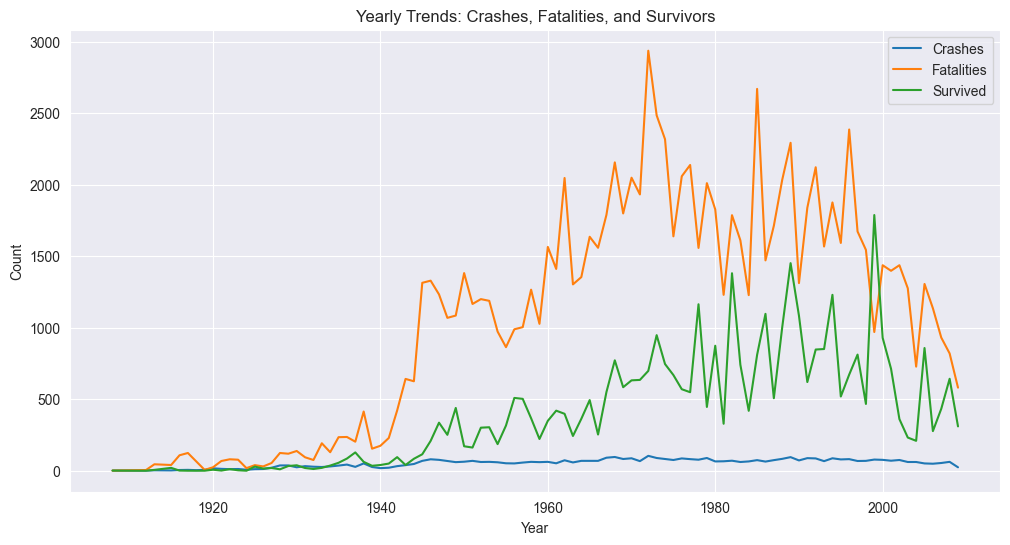

In [98]:
data['Survived'] = data['Aboard'] - data['Fatalities']
yearly_stats = data.groupby('Year').agg({
    'Aboard': 'sum',
    'Fatalities': 'sum',
    'Survived': 'sum',
    'Operator': 'count'  # Count crashes
}).rename(columns={'Operator': 'Crashes'}).reset_index()

# Plot yearly crashes
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_stats, x='Year', y='Crashes', label='Crashes')
sns.lineplot(data=yearly_stats, x='Year', y='Fatalities', label='Fatalities')
sns.lineplot(data=yearly_stats, x='Year', y='Survived', label='Survived')
plt.title('Yearly Trends: Crashes, Fatalities, and Survivors')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

/var/folders/bj/tyq7vymd5cvdqnrfjn113rb40000gn/T/ipykernel_2844/286315130.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_operators.values, y=top_operators.index, palette='viridis')


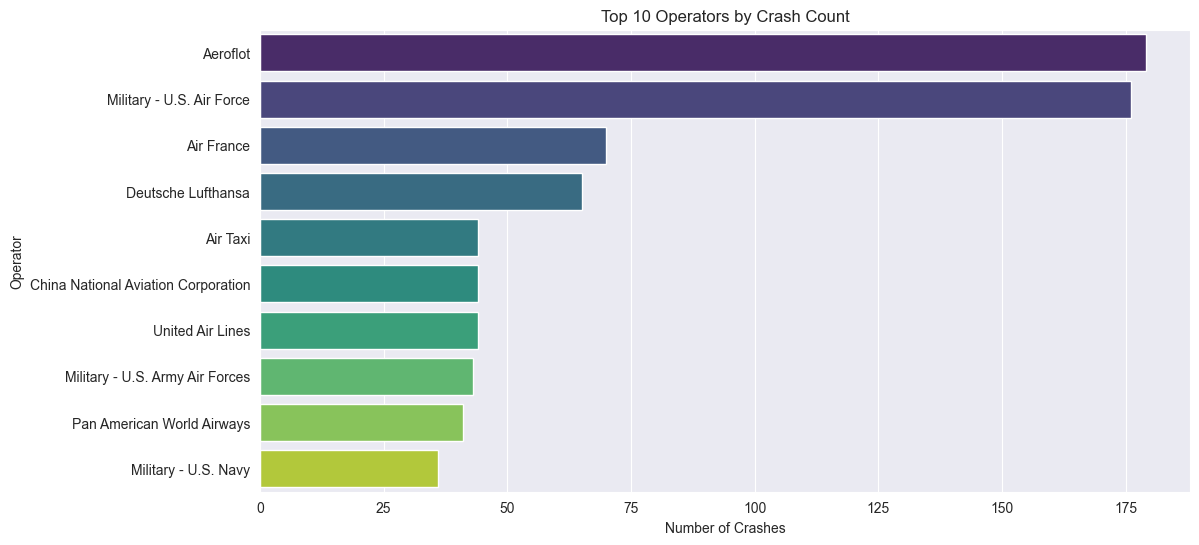

/var/folders/bj/tyq7vymd5cvdqnrfjn113rb40000gn/T/ipykernel_2844/286315130.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_types.values, y=top_types.index, palette='magma')


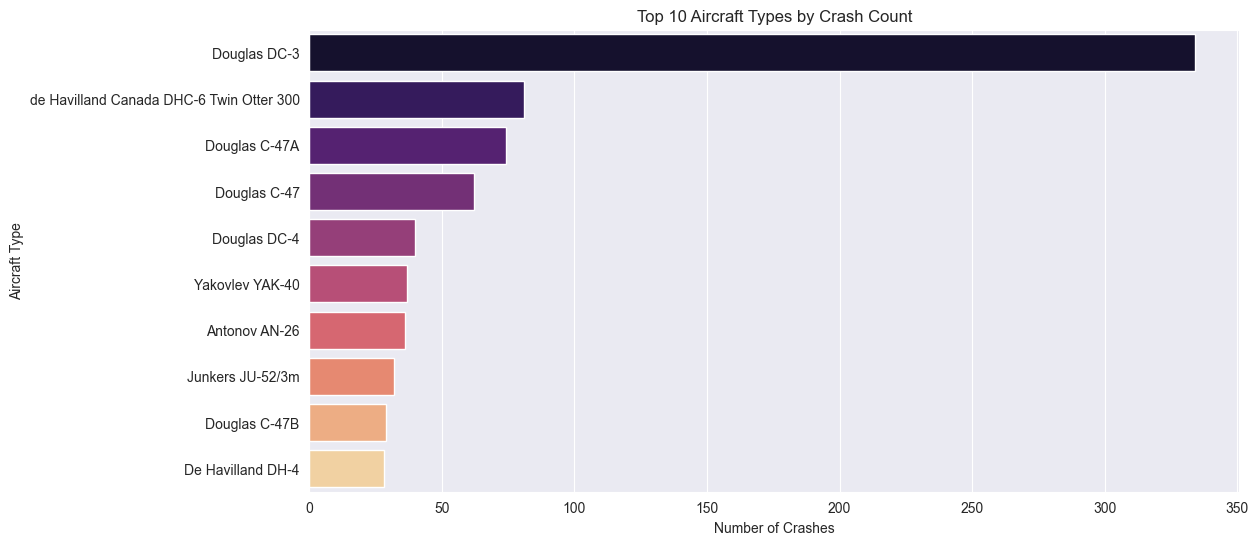

In [99]:
# 2. Highest crashes by Operator and Type
top_operators = data['Operator'].value_counts().head(10)
top_types = data['Type'].value_counts().head(10)

# Bar plot for top operators
plt.figure(figsize=(12, 6))
sns.barplot(x=top_operators.values, y=top_operators.index, palette='viridis')
plt.title('Top 10 Operators by Crash Count')
plt.xlabel('Number of Crashes')
plt.ylabel('Operator')
plt.show()

# Bar plot for top aircraft types
plt.figure(figsize=(12, 6))
sns.barplot(x=top_types.values, y=top_types.index, palette='magma')
plt.title('Top 10 Aircraft Types by Crash Count')
plt.xlabel('Number of Crashes')
plt.ylabel('Aircraft Type')
plt.show()

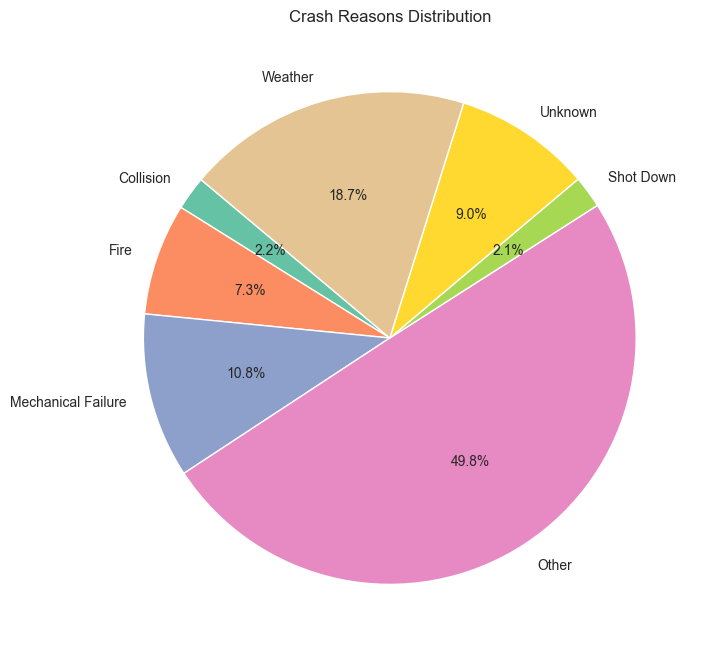

In [100]:
import re

def categorize_summary(summary):
    summary = str(summary).lower()
    if 'fire' in summary:
        return 'Fire'
    elif 'shot down' in summary or 'missile' in summary:
        return 'Shot Down'
    elif 'weather' in summary or 'storm' in summary or 'fog' in summary:
        return 'Weather'
    elif 'collision' in summary:
        return 'Collision'
    elif 'engine' in summary or 'mechanical' in summary:
        return 'Mechanical Failure'
    elif 'unknown' in summary:
        return 'Unknown'
    else:
        return 'Other'

data['Crash_Reason'] = data['Summary'].apply(categorize_summary)

# Crashes and deaths by category
reason_stats = data.groupby('Crash_Reason').agg({
    'Operator': 'count',  # Number of crashes
    'Fatalities': 'sum'
}).rename(columns={'Operator': 'Crashes'}).reset_index()

# Pie chart for crash reasons
plt.figure(figsize=(8, 8))
plt.pie(reason_stats['Crashes'], labels=reason_stats['Crash_Reason'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Crash Reasons Distribution')
plt.show()

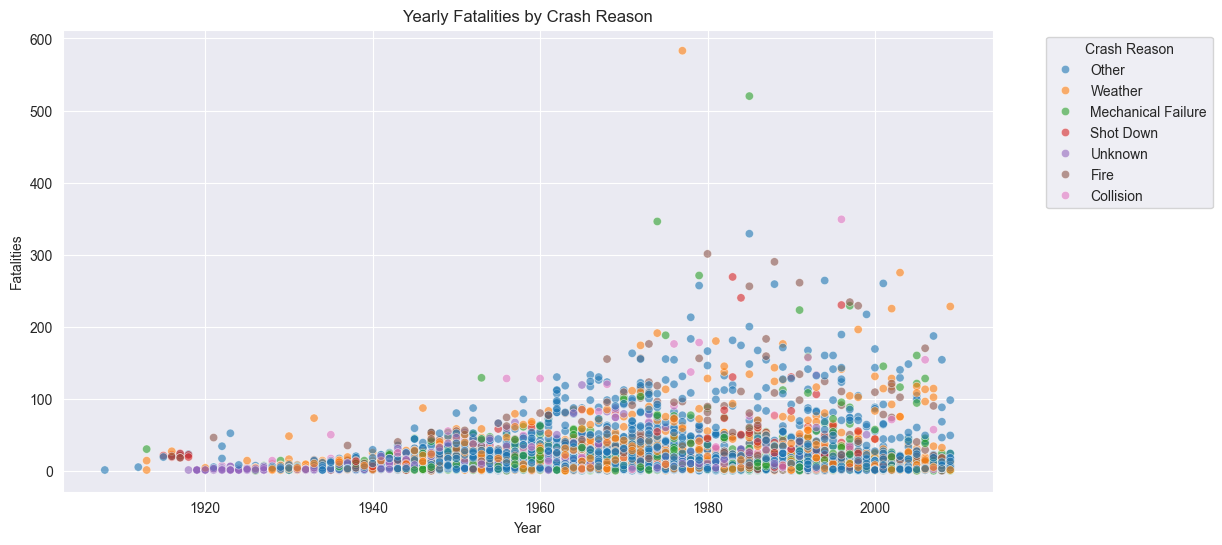

In [101]:
# 4. Insights: Trends and behaviors
# Scatter plot: Year vs Fatalities to observe any decline
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Year', y='Fatalities', hue='Crash_Reason', alpha=0.6, palette='tab10')
plt.title('Yearly Fatalities by Crash Reason')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.legend(title='Crash Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [102]:
yearly_stats.head(), reason_stats

(   Year  Aboard  Fatalities  Survived  Crashes
 0  1908     2.0         1.0       1.0        1
 1  1912     5.0         5.0       0.0        1
 2  1913    51.0        45.0       6.0        3
 3  1915    60.0        40.0      20.0        2
 4  1916   109.0       108.0       1.0        5,
          Crash_Reason  Crashes  Fatalities
 0           Collision      117      3977.0
 1                Fire      386     11762.0
 2  Mechanical Failure      570     10592.5
 3               Other     2623     49735.0
 4           Shot Down      111      3668.5
 5             Unknown      474      5334.0
 6             Weather      987     20551.5)

In [103]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [104]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_columns = ['Operator', 'Location', 'Type']

# Define the OneHotEncoder transformer for categorical columns
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Combine preprocessing steps using ColumnTransformer (only for categorical data)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Apply the transformations
processed_data = preprocessor.fit_transform(data)

# Get feature names for the one-hot encoded columns
encoded_cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Create DataFrame for the transformed data
processed_data_df = pd.DataFrame(processed_data, columns=encoded_cat_columns)

# Display the processed data
print("Original Data:")
print(data.head())
print("\nProcessed Data:")
print(processed_data_df.head())


Original Data:
        Date     Time                            Location  \
0 1908-09-17    17:18                 Fort Myer, Virginia   
1 1912-07-12    06:30             AtlantiCity, New Jersey   
2 1913-08-06  Unknown  Victoria, British Columbia, Canada   
3 1913-09-09    18:30                  Over the North Sea   
4 1913-10-17    10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army  Unknown  Demonstration        Wright Flyer III   
1    Military - U.S. Navy  Unknown    Test flight               Dirigible   
2                 Private        -        Unknown        Curtiss seaplane   
3  Military - German Navy  Unknown        Unknown  Zeppelin L-1 (airship)   
4  Military - German Navy  Unknown        Unknown  Zeppelin L-2 (airship)   

  Registration    cn/In  Aboard  Fatalities  Ground  \
0      Unknown        1     2.0         1.0     0.0   
1      Unknown  Unknown     5.0         5.0  

In [105]:
# Combine numerical features with encoded categorical data
numerical_data = data[['Aboard', 'Fatalities', 'Ground', 'Year']].reset_index(drop=True)
full_data = pd.concat([numerical_data, processed_data_df], axis=1)
full_data


,Aboard,Fatalities,Ground,Year,Operator_AB Aerotransport,Operator_ACES Colombia,Operator_ADC Airlines,Operator_ADES Colombia,Operator_AECA Cargo,Operator_AIDA,...,Type_de Havilland DHC-6 Twim Otter 100,Type_de Havilland DHC-6 Twin Otter 300,Type_de Havilland DHC-6-200,Type_de Havilland Dash-2 Beaver,Type_de Havilland Dash-2 float plane,Type_de Havilland Dove 1,Type_de Havilland Dragon 1,Type_de Havilland RU-6A Beaver /Bell UH-1H,Type_de havilland Canada Twin Otter 200,Type_deHavilland DH-86
0,2.0,1.0,0.0,1908,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,5.0,0.0,1912,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1913,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.0,14.0,0.0,1913,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,30.0,0.0,1913,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,112.0,98.0,2.0,2009,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5264,4.0,4.0,1.0,2009,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5265,228.0,228.0,0.0,2009,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5266,1.0,1.0,0.0,2009,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA for all data

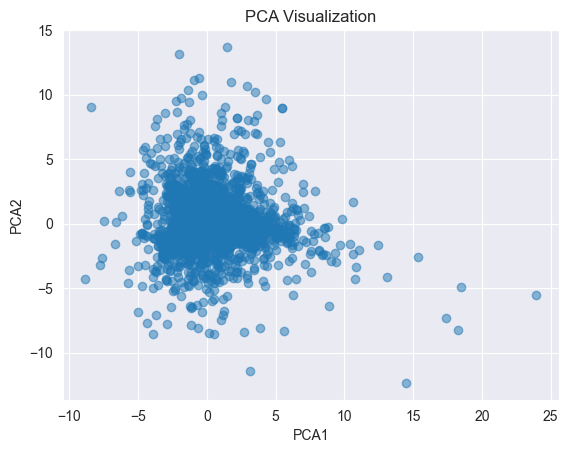

In [106]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data before PCA
scaler = StandardScaler()
scaled_data_full = scaler.fit_transform(full_data)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data_full)

# Add PCA components to the DataFrame
full_data['PCA1'] = pca_result[:, 0]
full_data['PCA2'] = pca_result[:, 1]

# Plot PCA results
plt.scatter(full_data['PCA1'], full_data['PCA2'], alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Visualization')
plt.show()


## PCA and DBSCAN on Principal components (Numerical data):

Best Parameters: eps=0.7, min_samples=3
Best Silhouette Score: 0.852


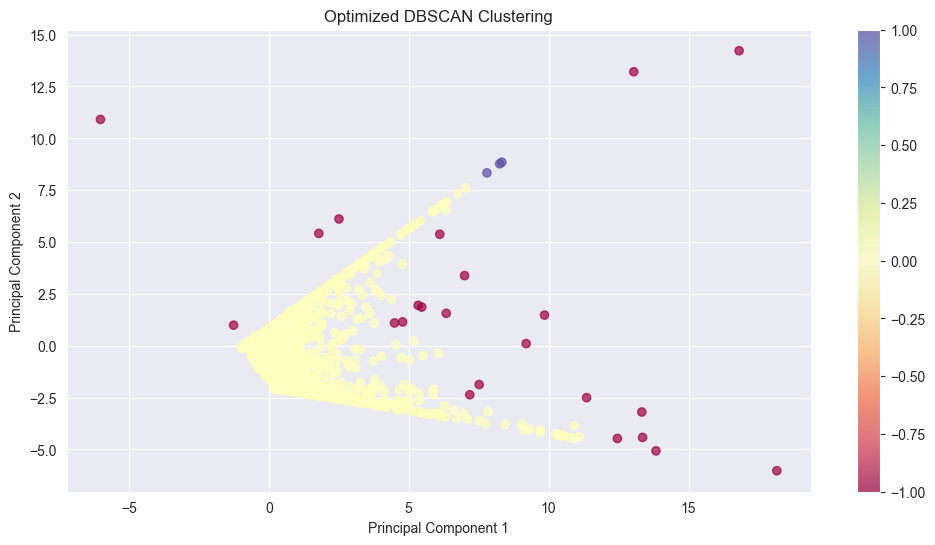


PCA Components Contribution:
                    PC1       PC2
Aboard         0.654177  0.255554
Survived       0.551585  0.384326
Fatalities     0.380471  0.657442
Survival_Rate  0.350194  0.590736
Ground         0.020305  0.076070

Cluster Summary:
   Cluster  Count
0       -1     23
1        0   5242
2        1      3


In [107]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def perform_dbscan_analysis(data, eps_range=[0.3, 0.5, 0.7], min_samples_range=[3, 5, 7]):
    """
    DBSCAN clustering with grid search for optimal parameters
    """
    # Base features + engineered features
    numerical_features = ['Aboard', 'Fatalities', 'Ground', 'Survived']
    data['Survival_Rate'] = (data['Survived'] / data['Aboard']).fillna(0)
    numerical_features.append('Survival_Rate')
    
    # Preprocessing
    numerical_data = data[numerical_features]
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numerical_data)
    
    # PCA
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(scaled_data)
    
    # Grid search
    best_score = -1
    best_params = None
    best_labels = None
    
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(pca_features)
            
            if len(set(labels)) > 1:
                mask = labels != -1
                score = silhouette_score(pca_features[mask], labels[mask])
                
                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)
                    best_labels = labels
    
    print(f"Best Parameters: eps={best_params[0]}, min_samples={best_params[1]}")
    print(f"Best Silhouette Score: {best_score:.3f}")
    
    # Visualization
    plt.figure(figsize=(12, 6))
    scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], 
                         c=best_labels, cmap='Spectral', alpha=0.7)
    plt.colorbar(scatter)
    plt.title('Optimized DBSCAN Clustering')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    
    # Feature importance
    pca_components = pd.DataFrame(
        pca.components_.T,
        columns=['PC1', 'PC2'],
        index=numerical_features
    )
    print("\nPCA Components Contribution:")
    print(pca_components.abs().sort_values(by='PC1', ascending=False))
    
    return best_labels, pca_features

# Run analysis
labels, features = perform_dbscan_analysis(data)

# Cluster summary
cluster_summary = pd.DataFrame({
    'Cluster': np.unique(labels),
    'Count': [np.sum(labels == i) for i in np.unique(labels)]
})
print("\nCluster Summary:")
print(cluster_summary)

## DBSCAN on whole data (No PCA)

Silhouette Score: 0.802


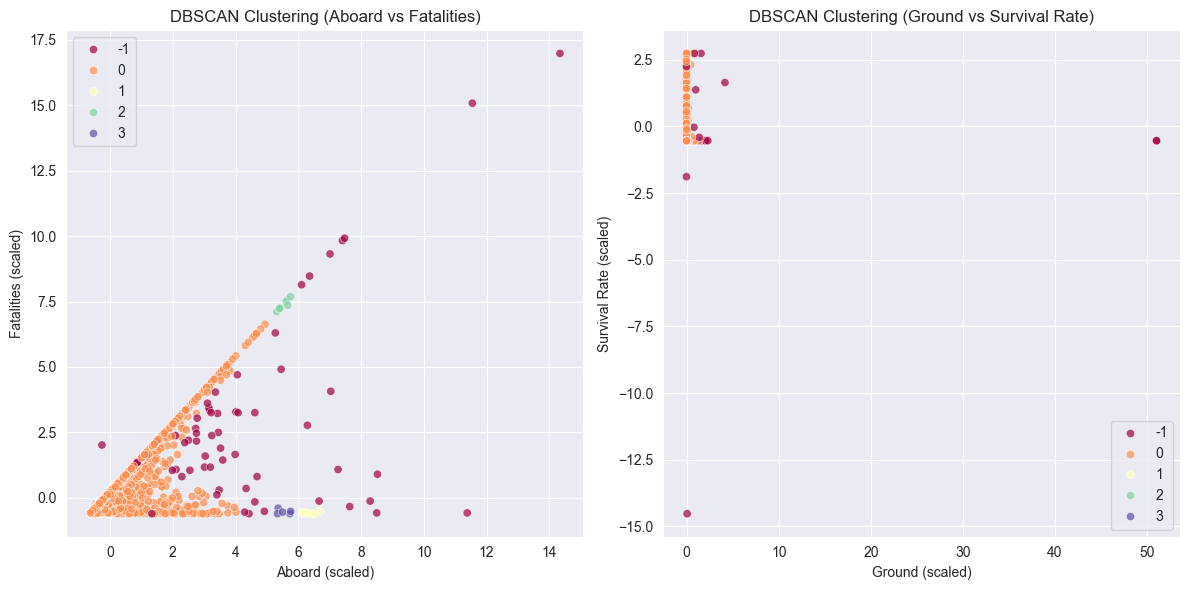


Cluster Summary:
   Cluster  Count
0       -1     70
1        0   5176
2        1      8
3        2      9
4        3      5

Cluster Feature Means:
     Aboard  Fatalities    Ground   Survived  Survival_Rate
0 -0.077387   -0.045402 -0.023167  -0.064787      -0.014450
1  6.335787   -0.574414 -0.029755  10.363193       2.723209
2  5.506489    7.342646  0.007372  -0.237499      -0.529976
3  5.535941   -0.532199 -0.029755   9.090636       2.704196


In [108]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Base features
numerical_features = ['Aboard', 'Fatalities', 'Ground', 'Survived']

# Feature engineering
data['Survival_Rate'] = (data['Survived'] / data['Aboard']).fillna(0)
numerical_features.append('Survival_Rate')

# Preprocessing
numerical_data = data[numerical_features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Calculate silhouette score
if len(set(dbscan_labels)) > 1:
    mask = dbscan_labels != -1
    sil_score = silhouette_score(scaled_data[mask], dbscan_labels[mask])
    print(f"Silhouette Score: {sil_score:.3f}")

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=scaled_data[:, 0], 
    y=scaled_data[:, 1], 
    hue=dbscan_labels, 
    palette='Spectral', 
    alpha=0.7
)
plt.title('DBSCAN Clustering (Aboard vs Fatalities)')
plt.xlabel('Aboard (scaled)')
plt.ylabel('Fatalities (scaled)')

plt.subplot(1, 2, 2)
sns.scatterplot(
    x=scaled_data[:, 2], 
    y=scaled_data[:, 4], 
    hue=dbscan_labels, 
    palette='Spectral', 
    alpha=0.7
)
plt.title('DBSCAN Clustering (Ground vs Survival Rate)')
plt.xlabel('Ground (scaled)')
plt.ylabel('Survival Rate (scaled)')
plt.tight_layout()
plt.show()

# Cluster summary
cluster_summary = pd.DataFrame({
    'Cluster': np.unique(dbscan_labels),
    'Count': [np.sum(dbscan_labels == i) for i in np.unique(dbscan_labels)]
})

# Feature importance per cluster
cluster_means = pd.DataFrame(
    scaled_data, 
    columns=numerical_features
)[dbscan_labels != -1].groupby(dbscan_labels[dbscan_labels != -1]).mean()

print("\nCluster Summary:")
print(cluster_summary)
print("\nCluster Feature Means:")
print(cluster_means)

In [109]:
data

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Month,Survived,Crash_Reason,Survival_Rate
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Unknown,Demonstration,Wright Flyer III,Unknown,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9,1.0,Other,0.500
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Unknown,Test flight,Dirigible,Unknown,Unknown,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7,0.0,Other,0.000
2,1913-08-06,Unknown,"Victoria, British Columbia, Canada",Private,-,Unknown,Curtiss seaplane,Unknown,Unknown,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,8,0.0,Weather,0.000
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,Unknown,Unknown,Zeppelin L-1 (airship),Unknown,Unknown,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,9,6.0,Weather,0.300
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,Unknown,Unknown,Zeppelin L-2 (airship),Unknown,Unknown,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10,0.0,Mechanical Failure,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,2009-05-20,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,Unknown,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",2009,5,14.0,Other,0.125
5264,2009-05-26,Unknown,"Near Isiro, DemocratiRepubliCongo",Service Air,Unknown,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,1.0,The cargo plane crashed while on approach to I...,2009,5,0.0,Other,0.000
5265,2009-06-01,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,2009,6,0.0,Weather,0.000
5266,2009-06-07,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Unknown,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,2009,6,0.0,Weather,0.000


## Classification Algos:

In [110]:
full_data

,Aboard,Fatalities,Ground,Year,Operator_AB Aerotransport,Operator_ACES Colombia,Operator_ADC Airlines,Operator_ADES Colombia,Operator_AECA Cargo,Operator_AIDA,...,Type_de Havilland DHC-6-200,Type_de Havilland Dash-2 Beaver,Type_de Havilland Dash-2 float plane,Type_de Havilland Dove 1,Type_de Havilland Dragon 1,Type_de Havilland RU-6A Beaver /Bell UH-1H,Type_de havilland Canada Twin Otter 200,Type_deHavilland DH-86,PCA1,PCA2
0,2.0,1.0,0.0,1908,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.190772,-0.310215
1,5.0,5.0,0.0,1912,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.793154,-1.733624
2,1.0,1.0,0.0,1913,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.094036,-0.682949
3,20.0,14.0,0.0,1913,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.224212,-1.303545
4,30.0,30.0,0.0,1913,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.834681,-0.903232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,112.0,98.0,2.0,2009,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.389682,-0.622373
5264,4.0,4.0,1.0,2009,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.223027,2.977763
5265,228.0,228.0,0.0,2009,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.989831,-1.274120
5266,1.0,1.0,0.0,2009,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.444372,2.990184


In [111]:
full_data['Has_Fatalities'] = (full_data['Fatalities'] > 0).astype(int)

In [112]:
class_data = full_data.drop(columns=['PCA1', 'PCA2', 'Fatalities'])

In [113]:
sc = StandardScaler()
scaled_classification = sc.fit_transform(class_data)

In [114]:
X = scaled_classification
y = class_data['Has_Fatalities']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predictions and evaluation
y_pred = classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [116]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare features and target
numerical_features = ['Aboard', 'Fatalities', 'Ground', 'Survived', 'Survival_Rate']
X = data[numerical_features]
y = labels

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Enhanced classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        class_weight='balanced_subsample',
        min_samples_leaf=1,
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=200,
        max_depth=4,
        learning_rate=0.1,
        random_state=42
    ),
    'SVM (RBF Kernel)': SVC(
        kernel='rbf',
        class_weight='balanced',
        probability=True,
        random_state=42
    ),
    'KNN': KNeighborsClassifier(
        n_neighbors=3,  # Reduced from 5 due to small class sizes
        weights='distance',
        metric='euclidean'
    )
}

# Train and evaluate
for name, clf in classifiers.items():
    print(f"\nTraining {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Training Random Forest...
Accuracy: 0.9968

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.43      0.60         7
           0       1.00      1.00      1.00      1573
           1       0.50      1.00      0.67         1

    accuracy                           1.00      1581
   macro avg       0.83      0.81      0.76      1581
weighted avg       1.00      1.00      1.00      1581


Confusion Matrix:
[[   3    4    0]
 [   0 1572    1]
 [   0    0    1]]

Training Gradient Boosting...
Accuracy: 0.9981

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.71      0.83         7
           0       1.00      1.00      1.00      1573
           1       0.50      1.00      0.67         1

    accuracy                           1.00      1581
   macro avg       0.83      0.90      0.83      1581
weighted avg       1.00      1.00      1.00      1581


Confusion Matrix:
[[   

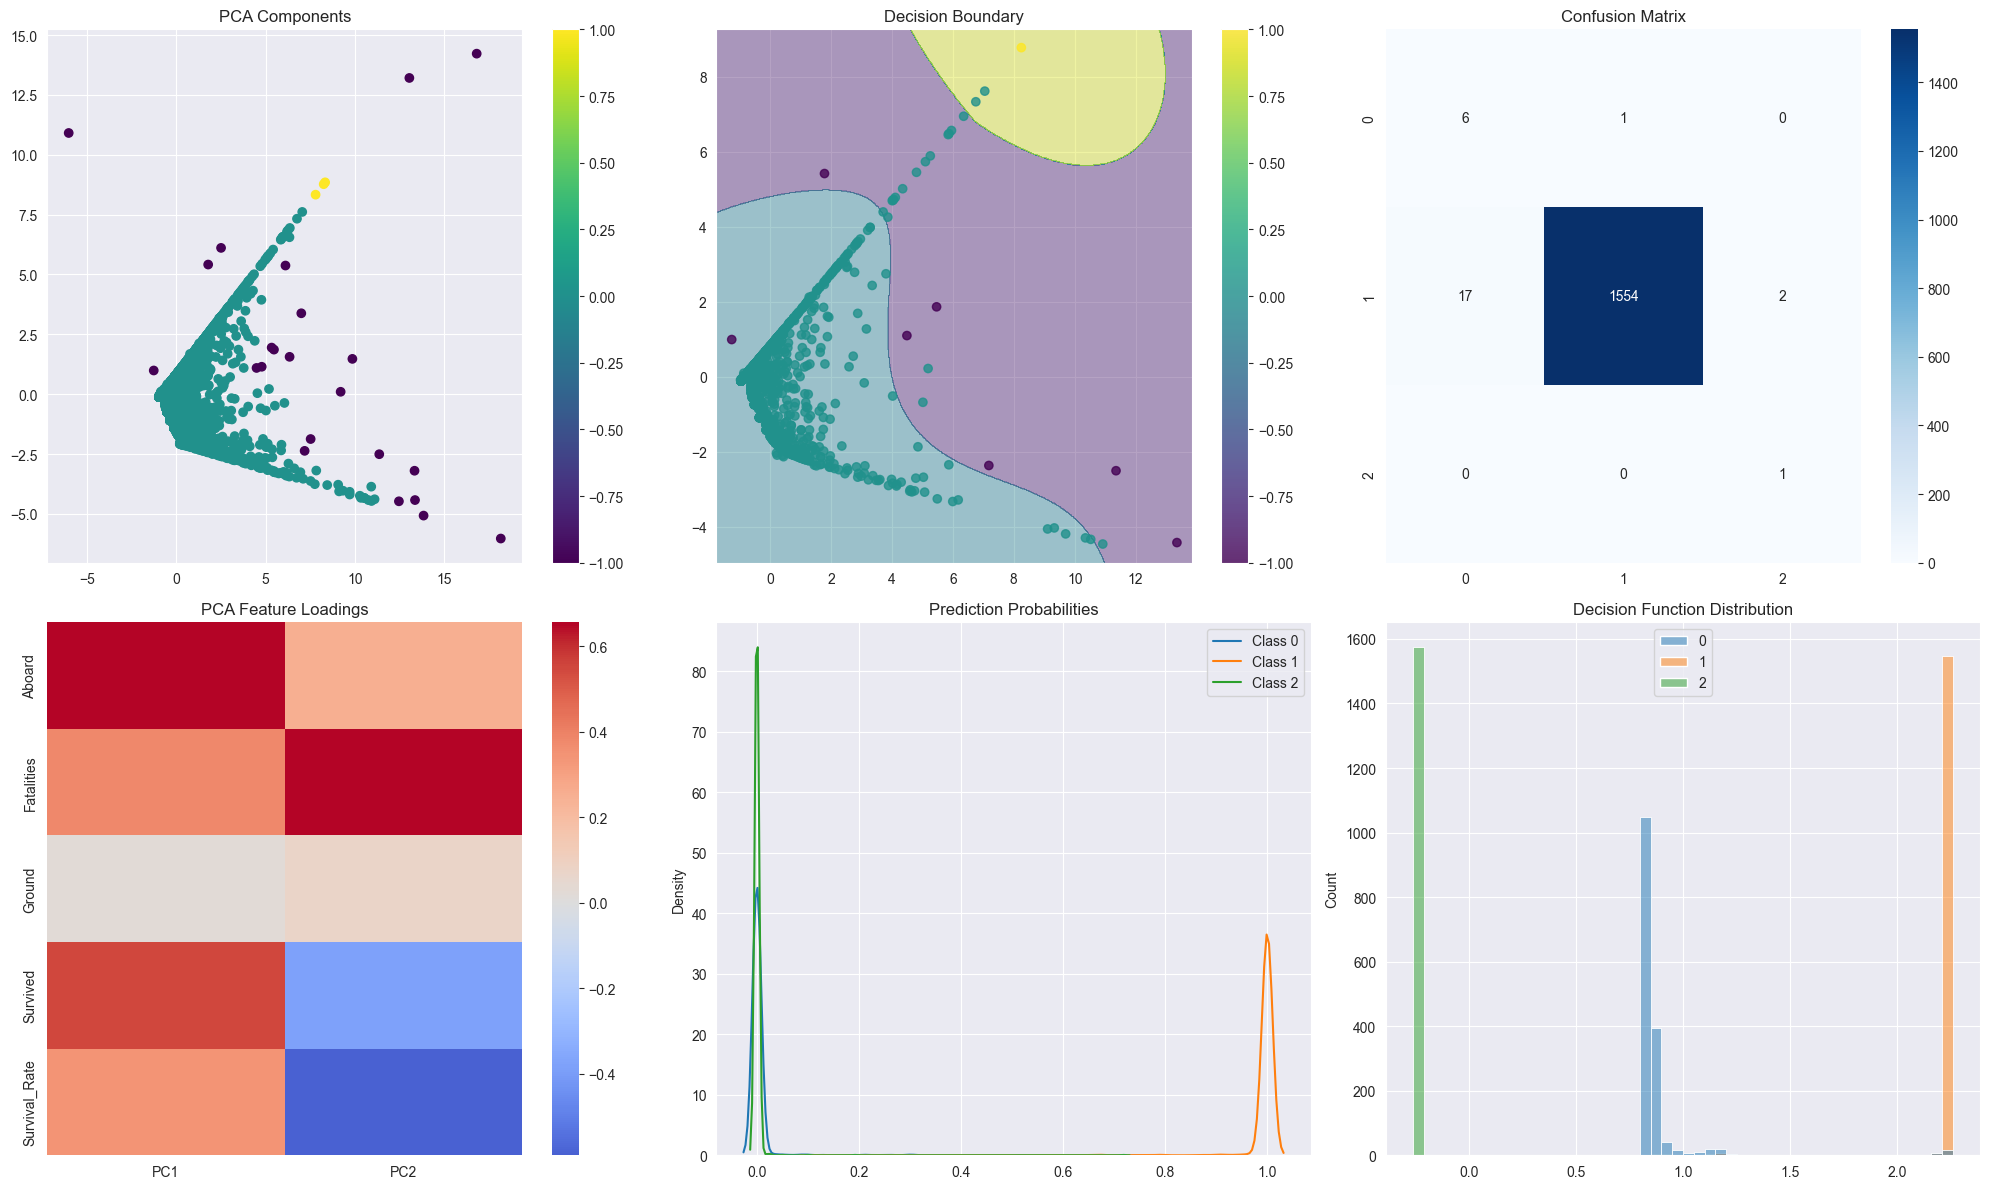


Classification Report:
              precision    recall  f1-score   support

          -1       0.26      0.86      0.40         7
           0       1.00      0.99      0.99      1573
           1       0.33      1.00      0.50         1

    accuracy                           0.99      1581
   macro avg       0.53      0.95      0.63      1581
weighted avg       1.00      0.99      0.99      1581


Feature Importance (PCA loadings magnitude):
         Feature  Importance
1     Fatalities    0.759598
0         Aboard    0.702322
4  Survival_Rate    0.686735
3       Survived    0.672274
2         Ground    0.078734


In [118]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def train_visualize_svm(X, y, features):
    # Scale and PCA
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_pca, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # SVM with optimized parameters
    svm = SVC(
        C=1.5,
        gamma=0.03,
        kernel='rbf',
        class_weight='balanced',
        probability=True,
        random_state=42
    )
    
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    
    # Visualizations
    fig = plt.figure(figsize=(20, 12))
    
    # PCA scatter
    ax1 = plt.subplot(2, 3, 1)
    scatter = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
    ax1.set_title('PCA Components')
    plt.colorbar(scatter, ax=ax1)
    
    # Decision boundary
    ax2 = plt.subplot(2, 3, 2)
    plot_decision_regions(X_test, y_test, svm, ax2)
    ax2.set_title('Decision Boundary')
    
    # Confusion matrix
    ax3 = plt.subplot(2, 3, 3)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax3, cmap='Blues')
    ax3.set_title('Confusion Matrix')
    
    # PCA loadings
    ax4 = plt.subplot(2, 3, 4)
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=['PC1', 'PC2'],
        index=features
    )
    sns.heatmap(loadings, ax=ax4, cmap='coolwarm', center=0)
    ax4.set_title('PCA Feature Loadings')
    
    # Probability distribution
    ax5 = plt.subplot(2, 3, 5)
    probas = svm.predict_proba(X_test)
    for i in range(probas.shape[1]):
        sns.kdeplot(probas[:, i], ax=ax5, label=f'Class {i}')
    ax5.set_title('Prediction Probabilities')
    ax5.legend()
    
    # Decision function
    ax6 = plt.subplot(2, 3, 6)
    decisions = svm.decision_function(X_test)
    sns.histplot(decisions, bins=50, ax=ax6)
    ax6.set_title('Decision Function Distribution')
    
    plt.tight_layout()
    plt.show()
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Feature importance based on PCA loadings
    print("\nFeature Importance (PCA loadings magnitude):")
    importance = pd.DataFrame({
        'Feature': features,
        'Importance': np.sqrt(np.sum(pca.components_**2, axis=0))
    }).sort_values('Importance', ascending=False)
    print(importance)
    
    return svm, scaler, pca

def plot_decision_regions(X, y, clf, ax):
    h = 0.02
    margin = 0.5
    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.8)
    plt.colorbar(scatter, ax=ax)

# Run analysis
features = ['Aboard', 'Fatalities', 'Ground', 'Survived', 'Survival_Rate']
X = data[features]
svm_model, scaler, pca = train_visualize_svm(X, labels, features)